# Problem 1 (20 points)

Consider the casino game of [blackjack](https://en.wikipedia.org/wiki/Blackjack). This involves two players, the agent and the dealer, both of whom aim to have a higher hand total than the other player without going over 21. The game starts with two cards dealt to each player, with one of the dealer's cards being shown.

The agent can repeatedly "hit" (draw a card) until it "busts" (hand total surpasses 21) or until it chooses to "stay" (end its turn). If the agent busts, it reveals its hand and immediately loses; otherwise, the agent keep its hand hidden and the dealer takes its turn in a similar fashion. Both the player and dealer may adjust their strategies depending on what their opponent shows or does (the dealer does not have a fixed strategy).

1. Suppose we formulate this as a search problem. Give a description of the state space and associated actions.

2. Classify this task environment according to the six properties discussed in class, and include a one- or two-sentence justification for each.

ENTER YOUR RESPONSES HERE

1. a. States: \\
    Based on the rules on the wikipedia of blackjack, "the value of cards two through ten is their pip value (2 through 10). Face cards (Jack, Queen, and King) are all worth ten. Aces can be worth one or eleven. A hand's value is the sum of the card values. Players are allowed to draw additional cards to improve their hands. A hand with an ace valued as 11 is called "soft", meaning that the hand will not bust by taking an additional card. The value of the ace will become one to prevent the hand from exceeding 21. Otherwise, the hand is called "hard." \\
  \
    The states could just be the sum of card values in the player’s hand. If it's without an ace, the sum of card values could be 4,5,6...,20. If it contains an ace, then the values could be 23,24,25...,31. Also, there should be 4 terminated states, win, lose, bust, perfect. \\
  \
    So the states could be {4, 5, 6, ..., 20, 23, 24, 25, ..., 31, win, lose, bust, perfect}


   b. Actions: \\
    Actions could be "hit" or "stay". \\
    So Actions = {hit, stay} \\

2. a. Fully or partially observable? Partially observable \\
    Because the agent does not know the hidden card that the dealer places face down. 

   b. Single-agent or multi-agent? Single-agent \\
    Because there is only one agent that plays with the dealer at a time. 

   c. Deterministic or stochastic? Stochastic \\
    Because the next card drawing is random. Also the hidden card of the dealer is also random.

   d. Episodic or sequential? Sequential \\
    Because the agent needs to add all drawing cards together. So hit or stay depends on what cards agent have now. 

   e. Static or dynamic? Static \\
    Because the cards stay the same while the agent is thinking. 

   f. Discrete or continuous? Discrete \\
    Because number of states, actions, percepts, time are all finite in blackjack. 

# Problem 2: (20 points)

In the state space graph below, S is the start state and G1 and G2 are both possible goal states. Costs are shown along edges and heuristic values are shown in the rectangles next to each node. Assume that search algorithms expand states, including goals, in alphabetical order when ties are present (G1 comes before G2).

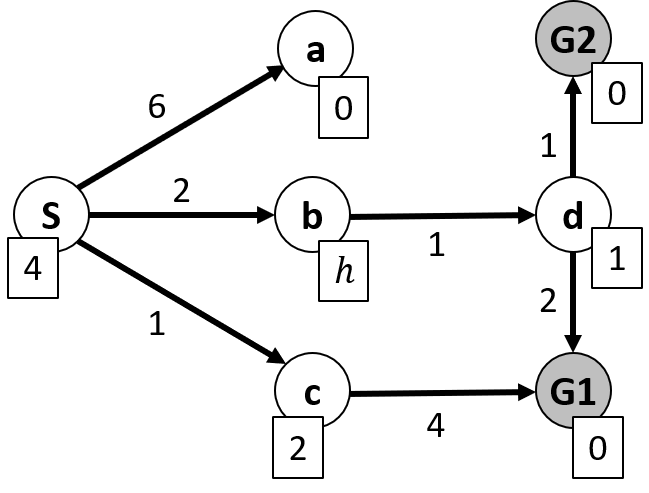

1. List out the ordering of the states expanded as well as the solution (as a state sequence) returned by DFS, BFS, and UCS. Assume that goal checking is done only when a node is popped off the frontier and that a reached table is  used by all algorithms.

2. List out the ordering of the states expanded as well as the solution returned by A* a) for an admissible value of $h$ and b) for an inadmissible value of $h$. Please state the actual value that you used for each case. Depending on your answer, explain why the state sequences are the same or why they are different.

ENTER YOUR RESPONSES HERE

1. a. DFS: \\
    order of the states expanded: s, a, b, c, d, g1, g2 \\
    solution: s->b->d->g1

   b. BFS: \\
    order of the states expanded: s, a, b, c, d, g1, g2 \\
    solution: s->c->g1
   
   c. UCS: \\
    order of the stats expanded: s, a, b, c, g1, d, g2 \\
    solution: s->b->d->g2

2. a. $h$ is admissible:  \\
    choose h = 1; \\
    order of the states expanded: s, a, b, c, d, g1, g2 \\
    solution: s->b->d->g2 \\

   b. $h$ is inadmissible: \\
    choose h = 5.0 \\
    order of the states expanded:  s, a, b, c, g1 \\
    solution: s->c->g1 \\


# Word Ladder

In this assignment you will implement and use search algorithms to solve [word ladder](https://en.wikipedia.org/wiki/Word_ladder) puzzles. Given two English words, the goal is to transform the first word into the second word by changing one letter at a time. The catch is that each new word in the process must also be an English (dictionary) word. The following function encodes this process using the [pyenchant](https://pypi.org/project/pyenchant/) package.

In [5]:
# RUN THIS ONCE IN THE BEGINNING TO INSTALL PYENCHANT
!pip install pyenchant
!apt-get install libenchant1c2a

     |████████████████████████████████| 61kB 3.4MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,310 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 am

In [9]:
import enchant, string

def successors(state):
  """
  Given a word, find all possible English word results from changing one letter.
  Return a list of (action, word) pairs, where action is the index of the
  changed letter.
  """
  d = enchant.Dict("en_US")
  child_states = []
  for i in range(len(state)):
    new = [state[:i]+x+state[i+1:] for x in string.ascii_lowercase]
    words = [x for x in new if d.check(x) and x != state]
    child_states = child_states + [(i, word) for word in words]
  return child_states

The ```successors``` function returns viable successor words during search. Below is a partial implementation of ```best_first_search```. This follows the pseudocode provided in lecture and the textbook with some enhancements. It takes in as arguments the starting state, goal state, and a priority function ```f```. When finished, it returns either a node containing the goal state or ```None```, along with the frontier's maximum size and number of nodes expanded. The latter two quantities are continually updated during the search process. Some more implementation details...

*   Nodes are implemented as Python dictionaries. A node contains five components: the state, the node's parent, the action going from parent to this node, the node's depth, and the cumulative cost to reach the node.
*   We implement a priority queue using [heapq](https://docs.python.org/3.0/library/heapq.html). The frontier contains tuples of the form (priority, id, node), and they are sorted in order of increasing priority. Nodes with the same priority are then sorted according to their id.
*   The priority function ```f``` takes in a node and the goal state as arguments.
*   **We count the "cost" of changing from a vowel ('a', 'e', 'i', 'o', or 'u') as 2 and changing from a consonant as 1.**

## Coding 1 (15 points)

Make sure you understand the description above, as well as the partial implementation given to you below. Then complete the loop portion of ```best_first_search``` where indicated. Some hints:

*   The goal test can be done by checking string equality with the goal state.
*   Remember to appropriately update ```max_frontier``` and ```nodes_expanded``` whenever one of these quantities changes.
*   Return the solution along with the max frontier size and number of nodes expanded.
*   Use the provided ```expand``` function for node expansion.
*   Push tuples into the frontier queue in the same way as in the initialization.

In [82]:
from heapq import heappush, heappop

def best_first_search(state, goal, f):
  """
  Inputs: Initial state, goal state, priority function
  Returns node containing goal or None if no goal found, max frontier size, 
  and total nodes expanded
  """
  node = {'state':state, 'parent':None, 'action':None, 'depth':0, 'cost':0}
  frontier = []
  heappush(frontier, (f(node, goal), id(node), node))
  #print (frontier)
  reached = {state: node}
  max_frontier = 1
  nodes_expanded = 0

  while frontier:
    node = heappop(frontier)[2]
    if len(frontier) > max_frontier:
      max_frontier = len(frontier)
    # YOUR CODE HERE
    if node["state"] == goal: 
      return node, max_frontier, nodes_expanded
    for child in expand(node):
      s = child["state"]
      nodes_expanded += 1
      #print (s)
      #if (nodes_expanded >= 10): break
      if ((s not in reached)) or (child['cost'] < reached[s]["cost"]):
        reached[s] = child
        #print (id(child))
        heappush(frontier, (f(child, goal), id(child), child))
        

  return None, max_frontier, nodes_expanded


def expand(node):
  """
  Given a node, return a list of successor nodes
  """
  vowels = ['a', 'e', 'i', 'o', 'u']
  state = node['state']
  children = []
  for successor in successors(state):
    cost = 2 if state[successor[0]] in vowels else 1
    children.append({'state':successor[1], 'parent':node,
                     'action':successor[0], 'depth':node['depth']+1,
                     'cost':node['cost']+cost})
  return children

## Coding 2 (5 points)

The ```best_first_search``` implementation is general. Each specific search algorithm behavior can be produced by specifying the appropriate priority function ```f```. Complete the priority functions below for depth-first, breadth-first, and uniform-cost search. (Although ```goal``` is an argument, it will not be used in these functions.)

In [63]:
def f_bfs(node, goal=None):
  # YOUR CODE HERE
  return node["depth"]


def f_dfs(node, goal=None):
  # YOUR CODE HERE
  return -node["depth"]

def f_ucs(node, goal=None):
  # YOUR CODE HERE
  return node["cost"]

We now have a complete implementation for DFS, BFS, and UCS. The following functions will help us present the results in a friendly way. The first function puts together the sequence of words in the solution. The second prints out all the results together.

In [64]:
def sequence(node):
  words = [node['state']]
  while node['parent'] is not None:
    node = node['parent']
    words.insert(0, node['state'])
  return words

def results(solution):
  if solution[0] is not None:
    print(sequence(solution[0]))
    print("Total cost:", solution[0]['cost'])
    print("Max frontier size:", solution[1])
    print("Nodes expanded:", solution[2])
  else: print("No solution found!")
  print("")

Time to test our implementation! We'll start off with a "simple" 3-letter word ladder to compare DFS and BFS. Try running the first cell below a couple times and take note of the results. Also feel free to experiment with other 3-letter word ladders (you can search online for common ones to verify their solutions).

Note: Sometimes DFS may get stuck and continue running for a long time. If that happens, you can kill the process and try running the cell again.

In [46]:
start = 'cat'
goal = 'cop'
solution = best_first_search(start, goal, f_bfs)
print("BFS")
results(solution)

BFS
['cat', 'cot', 'cop']
Total cost: 3
Max frontier size: 375
Nodes expanded: 3305



In [83]:
solution = best_first_search(start, goal, f_dfs)
print("DFS")
results(solution)

DFS
['cat', 'cal', 'col', 'cop']
Total cost: 4
Max frontier size: 515
Nodes expanded: 450084



In [84]:
solution = best_first_search(start, goal, f_dfs)
print("DFS")
results(solution)

DFS
['cat', 'vat', 'van', 'tan', 'tax', 'max', 'mag', 'jag', 'jig', 'dig', 'dog', 'wog', 'wot', 'tot', 'tom', 'pom', 'pod', 'bod', 'bid', 'yid', 'yip', 'kip', 'kit', 'lit', 'lix', 'xix', 'xiv', 'riv', 'rim', 'sim', 'sic', 'tic', 'til', 'oil', 'oik', 'oak', 'yak', 'yam', 'dam', 'day', 'dry', 'pry', 'pro', 'bro', 'bra', 'baa', 'bap', 'pap', 'paw', 'pew', 'dew', 'deb', 'dub', 'nub', 'nus', 'nos', 'cos', 'cop']
Total cost: 68
Max frontier size: 506
Nodes expanded: 142600



## Response 1 (10 points)

1.  Compare and contrast the solutions, costs, and number of nodes expanded by DFS and BFS. Which algorithm appears to perform "better" in each of these aspects?

2.  You should observe that the DFS solution can vary quite a bit from run to run. Why is this the case?

ENTER YOUR RESPONSE HERE

1.  I observe that BFS's max frontier size is 375 which is less than DFS's max frontier size 515. Also, nodes expanded for BFS is 3305, which is significantly less than DFS 450084. For total costs, BFS finds a path with total cost of 3, while DFS finds a path with total cost 4. \\
In general, BFS does better in all three aspects compared to DFS.

2.  This is because in our search tree, we have multiple final goal states at the end of the tree. Though the goal state might share the same word, they might have totally different paths correspondingly. For DFS, it only searches for a valid path that would lead to a goal state. But for different runs, it might run into different goal states. This could make either the runtime and the finally solution quite different. 


Now run the "harder" word ladder below comparing BFS and UCS.

In [85]:
start = 'small'
goal = 'large'

solution = best_first_search(start, goal, f_bfs)
print("BFS")
results(solution)

solution = best_first_search(start, goal, f_ucs)
print("UCS")
results(solution)

BFS
['small', 'shall', 'shale', 'shade', 'shads', 'sheds', 'seeds', 'seedy', 'needy', 'nerdy', 'nervy', 'nerve', 'serve', 'serge', 'sarge', 'large']
Total cost: 19
Max frontier size: 904
Nodes expanded: 29644

UCS
['small', 'stall', 'stalk', 'stark', 'stars', 'sears', 'hears', 'heads', 'herds', 'nerds', 'nerdy', 'nervy', 'nerve', 'serve', 'serge', 'sarge', 'large']
Total cost: 18
Max frontier size: 719
Nodes expanded: 24226



## Response 2 (5 points)

Explain your observation of the two algorithms' solutions. Why are they the same or different? Is either one guaranteed to be optimal?

ENTER YOUR RESPONSE HERE: \\
The solution paths are different. From the output, the third nodes are different. This is because BFS only cares the shallowest of the nodes. UCS takes the one that has min cumulative cost to expand. \\

UCS is guaranteed to be optimal whereas BFS is not.

## Coding 3 (10 points)

Let's now try our hand at informed search. We will be able to reuse ```best_first_search``` once again---we just need to implement the priority function, which will now utilize a heuristic. A suitable heuristic is the Hamming distance between a state and the goal: the number of indices where the corresponding letters are different. We can also make this heuristic more sophisticated by adding to the Hamming distance the number of vowels in the current word that must be changed to reach the goal word. 

Complete the ```f_astar``` and ```f_astar_vowel``` functions below to use the "simple" and "sophisticated" Hamming distances, respectively, described above as the heuristics. Don't forget to add in cumulative node cost as well.

In [96]:
def f_astar(node, goal):
  # YOUR CODE HERE
  state = node['state']
  i = 0
  count = 0
  while (i < len(state)):
    if (state[i] != goal[i]):
      count += 1
    i += 1
  return node['cost'] + count


def f_astar_vowel(node, goal):
  # YOUR CODE HERE
  vowels = ['a', 'e', 'i', 'o', 'u']
  state = node['state']
  i = 0
  count1 = 0
  count2 = 0
  while (i < len(state)):
    if (state[i] != goal[i]):
      count1 += 1
      if (state[i] in vowels):
        count2 += 1
    i += 1
  return count1 + count2 + node['cost']


## Response 3 (5 points)

Are both of the above heuristics admissible? Does either of the above heuristics dominate the other? Explain your answers.

ENTER YOUR RESPONSE HERE

Both heruristics are admissible. 
For f_astar, it evaluates the number of indices where the corresponding letters are different. For a word, if it wants to transfer into another word. It will at least have to change corrsponding different letters. So, it's admissible.

For f_astar_vowel, if we want to change into another different word, we must at least change the number of vowels in the current word that need to be changed to reach the goal word. So, it's admissible.

f_astar_vowel dominates f_astar, because it has another added term for the vowels. So, f_astar_vowel's return value is always greater than f_astar. 

If you correctly implemented the A* functions above with the two versions of Hamming distance, then you should be able to run the tests below and see results consistent with what we learned about this search algorithm. Answer the two questions below the code block to finish up this part of the assignment.

In [99]:
start = 'small'
goal = 'large'

solution = best_first_search(start, goal, f_astar)
print("A* simple Hamming")
results(solution)

A* simple Hamming
['small', 'stall', 'stalk', 'stark', 'stars', 'sears', 'bears', 'beads', 'bends', 'bands', 'bandy', 'randy', 'rangy', 'range', 'mange', 'marge', 'large']
Total cost: 18
Max frontier size: 864
Nodes expanded: 18030



In [100]:
solution = best_first_search(start, goal, f_astar_vowel)
print("A* Hamming with vowels")
results(solution)

A* Hamming with vowels
['small', 'stall', 'stalk', 'stark', 'stars', 'sears', 'hears', 'heads', 'herds', 'nerds', 'nerdy', 'nervy', 'nerve', 'serve', 'serge', 'sarge', 'large']
Total cost: 18
Max frontier size: 894
Nodes expanded: 14710



## Response 4 (10 points)

1.  The results of A* with the two heuristics should look very similar, but are the slight differences that you observe in frontier size and number of nodes expanded consistent with your expectations?

2.  How does the performance of A* compare to that of UCS in terms of solution optimality as well as the number of nodes expanded? Is it ever possible for A* to be worse than UCS?

ENTER YOUR RESPONSES HERE

1.  Yes. Max Frontier size for both are about the same. 
The number of nodes expanded for f_astar_vowel are less than f_astar. This is because f_astar_vowel dominates f_astar. 

2.  The A* algorithm and the UCS both return optimal solution. However, A* algorithm has less nodes expanded compared to UCS algorithm. For Max frontier size A* algorithm and UCS algorithm are approximately the same. It's not possible for A* to be worse than UCS.

# Submission

Prior to submitting your homework, do a clean run of all cells by clearing all outputs and rerunning the entire notebook. Make sure that all outputs are what you expect them to be and that everything is error-free. Then save and download your notebook, including all outputs, and submit by following the instructions provided to you.